In [77]:
#HERE im using lstm for next word prediction ....
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [78]:
with open('/content/eccomerce_next_predictor.txt' ,"r" ,encoding = "utf8" ) as f:
  force_txt = f.read()

In [79]:
force_txt

'E-commerce is the process of selling goods and services online. Customers come to the website or online marketplace and purchase products using electronic payments. Upon receiving the money, the merchant ships the goods or provides the service.\n\nE-commerce has been around since the early 1990s when Amazon just sold books. Today, it’s a multibillion-dollar industry. According to Statista, the U.S. e-commerce industry is expected to eclipse $1 trillion in value in 2024, making it a major economic staple for the national economy.\n\nHow does e-commerce work?\nE-commerce works on the same principles as a physical store. Customers come into your e-commerce store, browse products and make a purchase. The big difference is they don’t have to get off their couch to do so, and your customer base isn’t limited to a specific geographic area or region.\n\nWhether you’re selling running shoes or home supplies, you go through the same process when operating an e-commerce website:\n\nAccept the or

In [80]:
tokenizer = Tokenizer()

In [81]:
tokenizer.fit_on_texts([force_txt])

In [82]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'and': 3,
 'a': 4,
 'commerce': 5,
 'of': 6,
 'e': 7,
 'in': 8,
 'is': 9,
 'for': 10,
 'business': 11,
 'or': 12,
 'as': 13,
 'you': 14,
 'that': 15,
 'can': 16,
 'are': 17,
 'on': 18,
 'an': 19,
 'online': 20,
 'with': 21,
 'it': 22,
 'products': 23,
 'have': 24,
 'companies': 25,
 'their': 26,
 'your': 27,
 'by': 28,
 'be': 29,
 'this': 30,
 'more': 31,
 'services': 32,
 'customers': 33,
 'they': 34,
 'from': 35,
 'goods': 36,
 'may': 37,
 'sales': 38,
 'consumer': 39,
 'growth': 40,
 'how': 41,
 'has': 42,
 'customer': 43,
 'consumers': 44,
 'digital': 45,
 'company': 46,
 'product': 47,
 'retail': 48,
 'than': 49,
 'many': 50,
 'such': 51,
 'at': 52,
 'also': 53,
 'retailers': 54,
 'most': 55,
 'businesses': 56,
 'chemical': 57,
 'value': 58,
 'what': 59,
 'will': 60,
 'sell': 61,
 'up': 62,
 'brands': 63,
 'store': 64,
 'there': 65,
 '”': 66,
 'b2b': 67,
 'service': 68,
 'industry': 69,
 'make': 70,
 'through': 71,
 'other': 72,
 'not': 73,
 'ecommerce': 74,


In [83]:
len(tokenizer.word_index) +1


2558

In [84]:
input_sequences = []
for sentence in force_txt.split('\n'):
  #print(sentence)
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])


In [85]:
for sentence in force_txt.split('\n'):
  print(sentence)

E-commerce is the process of selling goods and services online. Customers come to the website or online marketplace and purchase products using electronic payments. Upon receiving the money, the merchant ships the goods or provides the service.

E-commerce has been around since the early 1990s when Amazon just sold books. Today, it’s a multibillion-dollar industry. According to Statista, the U.S. e-commerce industry is expected to eclipse $1 trillion in value in 2024, making it a major economic staple for the national economy.

How does e-commerce work?
E-commerce works on the same principles as a physical store. Customers come into your e-commerce store, browse products and make a purchase. The big difference is they don’t have to get off their couch to do so, and your customer base isn’t limited to a specific geographic area or region.

Whether you’re selling running shoes or home supplies, you go through the same process when operating an e-commerce website:

Accept the order. The c

In [86]:
input_sequences

[[7, 5],
 [7, 5, 9],
 [7, 5, 9, 1],
 [7, 5, 9, 1, 106],
 [7, 5, 9, 1, 106, 6],
 [7, 5, 9, 1, 106, 6, 164],
 [7, 5, 9, 1, 106, 6, 164, 36],
 [7, 5, 9, 1, 106, 6, 164, 36, 3],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32, 20],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32, 20, 33],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32, 20, 33, 165],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32, 20, 33, 165, 2],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32, 20, 33, 165, 2, 1],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32, 20, 33, 165, 2, 1, 86],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32, 20, 33, 165, 2, 1, 86, 12],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32, 20, 33, 165, 2, 1, 86, 12, 20],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32, 20, 33, 165, 2, 1, 86, 12, 20, 401],
 [7, 5, 9, 1, 106, 6, 164, 36, 3, 32, 20, 33, 165, 2, 1, 86, 12, 20, 401, 3],
 [7,
  5,
  9,
  1,
  106,
  6,
  164,
  36,
  3,
  32,
  20,
  33,
  165,
  2,
  1,
  86,
  12,
  20,
  401,
  3,
  166],
 [7,
  5,
  9,
  1,
  106,
  6,
  164,
  36,
  3,
  32,
  

In [87]:
#now we should do padding with pre 0
max_len = max([len(x) for x in input_sequences])

In [88]:
max_len
#weshould do padding on the basis of max len

152

In [89]:
min_len = min([len(x) for x in input_sequences])
print(min_len)

2


In [90]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding='pre')

In [91]:
padded_input_sequences

array([[   0,    0,    0, ...,    0,    7,    5],
       [   0,    0,    0, ...,    7,    5,    9],
       [   0,    0,    0, ...,    5,    9,    1],
       ...,
       [   0,    0,    0, ...,    1, 2554, 2555],
       [   0,    0,    0, ..., 2554, 2555, 2556],
       [   0,    0,    0, ..., 2555, 2556, 2557]], dtype=int32)

In [92]:
padded_input_sequences.shape

(10645, 152)

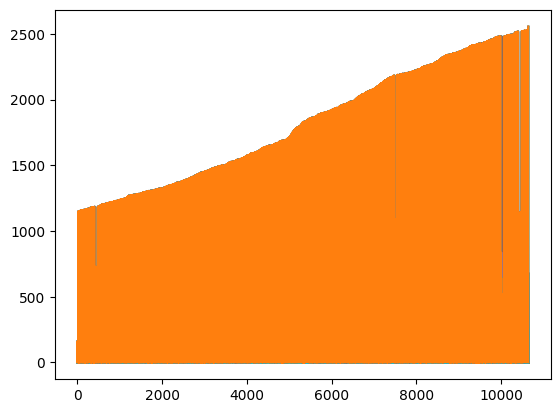

In [93]:
import matplotlib.pyplot as plt
plt.plot(padded_input_sequences)

In [94]:
X = padded_input_sequences[:,:-1]

In [95]:
X

array([[   0,    0,    0, ...,    0,    0,    7],
       [   0,    0,    0, ...,    0,    7,    5],
       [   0,    0,    0, ...,    7,    5,    9],
       ...,
       [   0,    0,    0, ...,    6,    1, 2554],
       [   0,    0,    0, ...,    1, 2554, 2555],
       [   0,    0,    0, ..., 2554, 2555, 2556]], dtype=int32)

In [96]:
X.shape
#here we can observe that last value use for prediction

(10645, 151)

In [97]:
y = padded_input_sequences[:,-1]

In [98]:
y.shape

(10645,)

In [99]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=7038)

In [100]:
y.shape

(10645, 7038)

In [101]:
#now making model ...
model = Sequential()
model.add(Embedding(7038, 100, input_length=max_len-1))
model.add(LSTM(150))
model.add(Dense(7038, activation='softmax'))

In [102]:
#to comple we use categorical as it is multiclass classification
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics =['accuracy'])

In [103]:
#model summery
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 151, 100)          703800    
                                                                 
 lstm_9 (LSTM)               (None, 150)               150600    
                                                                 
 dense_6 (Dense)             (None, 7038)              1062738   
                                                                 
Total params: 1917138 (7.31 MB)
Trainable params: 1917138 (7.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


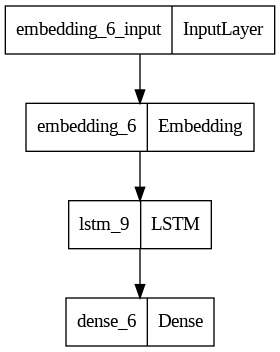

In [104]:
from tensorflow import keras
from keras.utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [105]:
model.fit(X, y , epochs =30 )

Epoch 1/30
333/333 [==============================] - 25s 70ms/step - loss: 7.1350 - accuracy: 0.0394
Epoch 2/30
333/333 [==============================] - 10s 29ms/step - loss: 6.3870 - accuracy: 0.0595
Epoch 3/30
333/333 [==============================] - 7s 20ms/step - loss: 6.2251 - accuracy: 0.0669
Epoch 4/30
333/333 [==============================] - 6s 17ms/step - loss: 6.0652 - accuracy: 0.0745
Epoch 5/30
333/333 [==============================] - 6s 17ms/step - loss: 5.8508 - accuracy: 0.0835
Epoch 6/30
333/333 [==============================] - 4s 13ms/step - loss: 5.5970 - accuracy: 0.1016
Epoch 7/30
333/333 [==============================] - 4s 12ms/step - loss: 5.3290 - accuracy: 0.1195
Epoch 8/30
333/333 [==============================] - 5s 14ms/step - loss: 5.0644 - accuracy: 0.1346
Epoch 9/30
333/333 [==============================] - 4s 12ms/step - loss: 4.8094 - accuracy: 0.1510
Epoch 10/30
333/333 [==============================] - 4s 12ms/step - loss: 4.5553 - accu

In [114]:
# now making prediction
import time
text = "market"

for i in range(8):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=max_len, padding='pre')#pre set zero before number
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 [==============================] - 0s 19ms/step
market is
1/1 [==============================] - 0s 19ms/step
market is the
1/1 [==============================] - 0s 30ms/step
market is the crowned
1/1 [==============================] - 0s 19ms/step
market is the crowned champion
1/1 [==============================] - 0s 20ms/step
market is the crowned champion of
1/1 [==============================] - 0s 19ms/step
market is the crowned champion of e
1/1 [==============================] - 0s 20ms/step
market is the crowned champion of e commerce
1/1 [==============================] - 0s 43ms/step
market is the crowned champion of e commerce is


In [ ]:

#in this case it is exmple of deep RNN

model = Sequential()
model.add(Embedding(7038, 100, input_length=max_len-1))
model.add(LSTM(150 , return_sequences=True) )
model.add(LSTM(150))
model.add(Dense(7038, activation='softmax'))
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics =['accuracy'])


model.fit(X, y , epochs =20 )

Epoch 1/20
333/333 [==============================] - 28s 75ms/step - loss: 7.1673 - accuracy: 0.0341
Epoch 2/20
333/333 [==============================] - 9s 26ms/step - loss: 6.4174 - accuracy: 0.0593
Epoch 3/20
333/333 [==============================] - 9s 26ms/step - loss: 6.2574 - accuracy: 0.0668
Epoch 4/20
333/333 [==============================] - 7s 22ms/step - loss: 6.1494 - accuracy: 0.0717
Epoch 5/20
333/333 [==============================] - 7s 21ms/step - loss: 6.0347 - accuracy: 0.0753
Epoch 6/20
333/333 [==============================] - 8s 23ms/step - loss: 5.9101 - accuracy: 0.0806
Epoch 7/20
333/333 [==============================] - 6s 19ms/step - loss: 5.7899 - accuracy: 0.0860
Epoch 8/20
333/333 [==============================] - 6s 19ms/step - loss: 5.6691 - accuracy: 0.0940
Epoch 9/20
333/333 [==============================] - 6s 18ms/step - loss: 5.5477 - accuracy: 0.0984
Epoch 10/20
333/333 [==============================] - 7s 20ms/step - loss: 5.4285 - accur

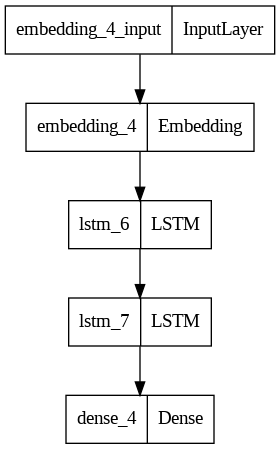

In [ ]:
from tensorflow import keras
from keras.utils  import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [ ]:

#summery of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 151, 100)          703800    
                                                                 
 lstm_8 (LSTM)               (None, 150)               150600    
                                                                 
 dense_5 (Dense)             (None, 7038)              1062738   
                                                                 
Total params: 1917138 (7.31 MB)
Trainable params: 1917138 (7.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
